In [1]:
from data.norec.dataloader import load_full_dataset
import pandas as pd

In [2]:
data = load_full_dataset()

train = data['train']
val = data['dev']
test = data['test']

combined_data = pd.concat([train, val, test]).reset_index(drop=True)

print(f"Train: {train.shape}")
print(f"Val: {val.shape}")
print(f"Test: {test.shape}")
print(f"Combined: {combined_data.shape}")

Train: (34903, 2)
Val: (4360, 2)
Test: (4351, 2)
Combined: (43614, 2)


In [3]:
combined_data.head()

,text,label
0,Travoltas dummeste rolle\nRegi: \nPierre Morel...,0
1,Vårens livligste album\nI fjor toppet han list...,2
2,Steindødt i Stepford\nRegi: \nFrank Oz. \nMed:...,0
3,En poengtert sammenføyning av det søte og det ...,2
4,Safe\nVoldsom film med dårlig actionflyt \n\nJ...,1


<AxesSubplot:>

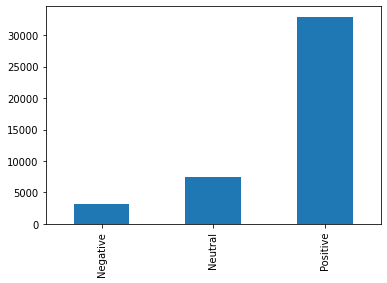

In [4]:
# Checking whether the dataset is balanced
combined_data["label"].replace({0: "Negative", 1: "Neutral", 2: "Positive"}).value_counts().sort_index().plot.bar()

<AxesSubplot:>

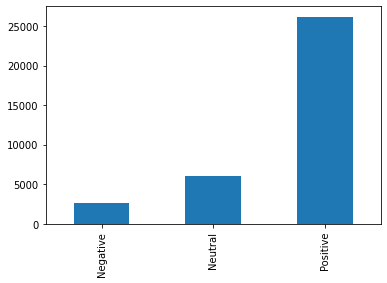

In [5]:
train["label"].replace({0: "Negative", 1: "Neutral", 2: "Positive"}).value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

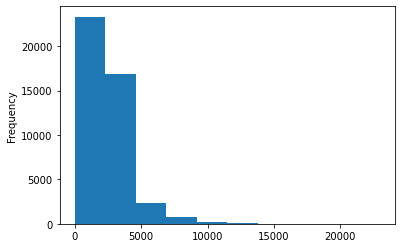

In [6]:
# A histogram of the number of words in each review
combined_data["text"].str.len().plot.hist()

In [7]:
# Aggregating the reviews into a single string to plot into a wordcloud
aggregated_data = combined_data.groupby("label")["text"].apply(" ".join).reset_index()

positive_texts = aggregated_data[aggregated_data["label"] == 2]["text"].values[0]
neutral_texts = aggregated_data[aggregated_data["label"] == 1]["text"].values[0]
negative_texts = aggregated_data[aggregated_data["label"] == 0]["text"].values[0]

In [8]:
from utils.preprocessing import load_stopwords
from collections import Counter
from tqdm import tqdm

stopwords = load_stopwords()
def most_common_words(text, n=10):
    word_counter = Counter()
    for word in tqdm(text.split(), desc="Counting words"):
        word = word.lower()
        if word not in stopwords and word.isalpha():
            word_counter[word] += 1
    return word_counter.most_common(n)

In [9]:
most_common_words(positive_texts)

Counting words: 100%|██████████| 13950672/13950672 [00:53<00:00, 261647.70it/s]


[('litt', 27514),
 ('får', 26987),
 ('to', 24360),
 ('gjør', 21637),
 ('helt', 20659),
 ('the', 20038),
 ('godt', 18654),
 ('kommer', 17690),
 ('alt', 16870),
 ('første', 15732)]

In [10]:
most_common_words(neutral_texts)

Counting words: 100%|██████████| 2610924/2610924 [00:09<00:00, 270914.04it/s]


[('litt', 5330),
 ('får', 5165),
 ('filmen', 4754),
 ('to', 4570),
 ('helt', 4228),
 ('the', 3962),
 ('gjør', 3750),
 ('nok', 3644),
 ('kommer', 3259),
 ('alt', 3101)]

In [11]:
most_common_words(negative_texts)

Counting words: 100%|██████████| 1046997/1046997 [00:03<00:00, 298494.36it/s]


[('filmen', 2415),
 ('får', 2045),
 ('to', 1725),
 ('the', 1638),
 ('alt', 1491),
 ('gjør', 1434),
 ('litt', 1356),
 ('helt', 1338),
 ('kommer', 1313),
 ('ser', 1216)]

In [12]:
from wordcloud import WordCloud

positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_texts)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_texts)
neutral_wordcloud = WordCloud(stopwords=stopwords).generate(neutral_texts)

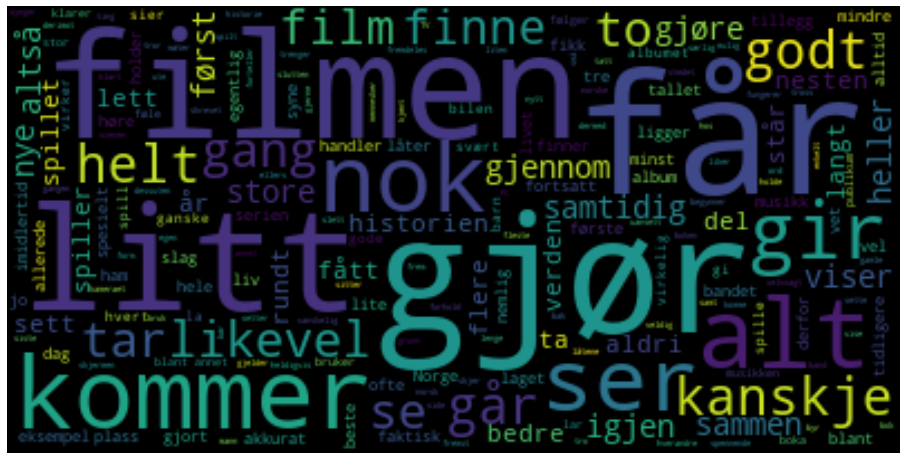

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

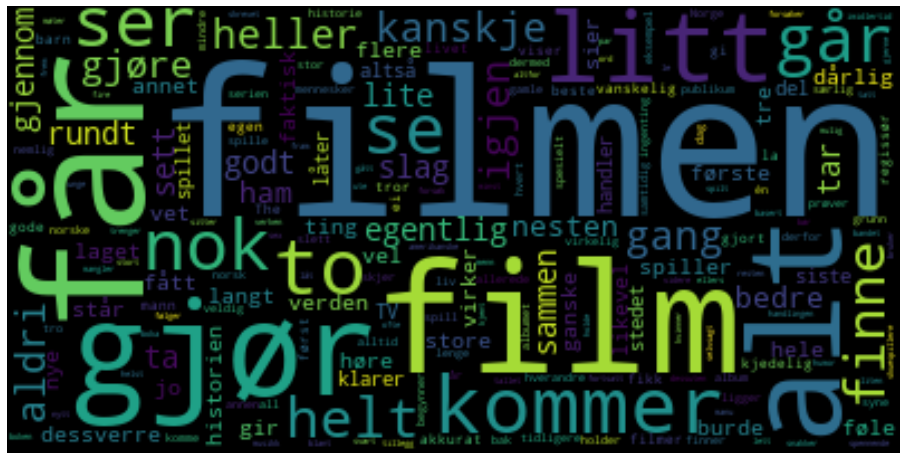

In [14]:
plt.figure(figsize=(16, 9))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

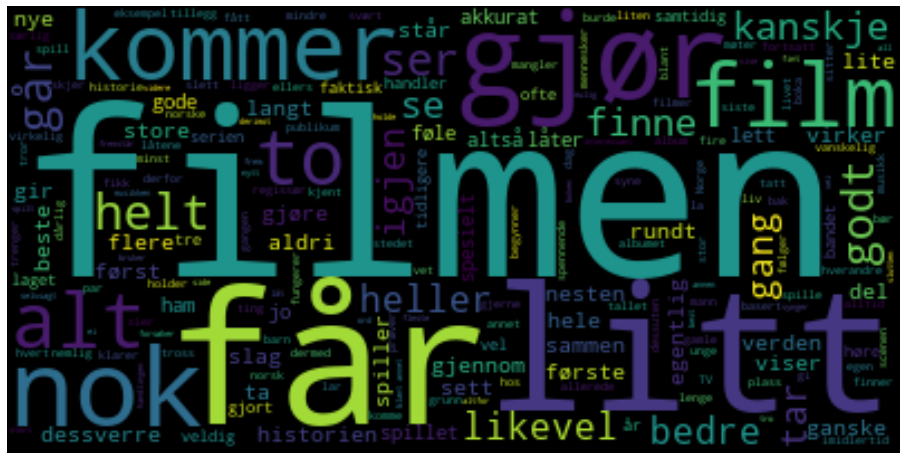

In [15]:
plt.figure(figsize=(16, 9))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()